In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
!pip install imbalance-learn

ERROR: Could not find a version that satisfies the requirement imbalance-learn (from versions: none)
ERROR: No matching distribution found for imbalance-learn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke prediction dataset.csv')

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df = pd.DataFrame(data)
data = df.drop("id", axis='columns')

In [ ]:
data.head(50)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


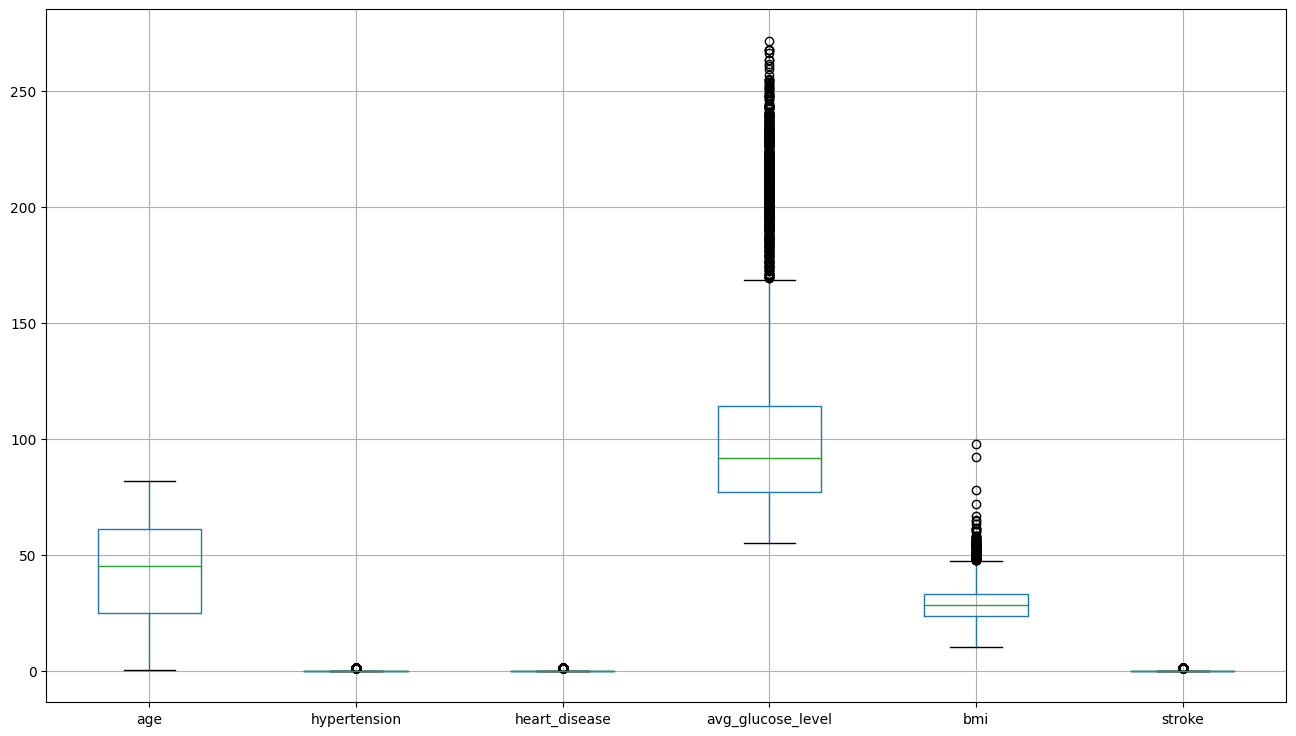

In [ ]:
data.boxplot(figsize=(16,9))
plt.show()

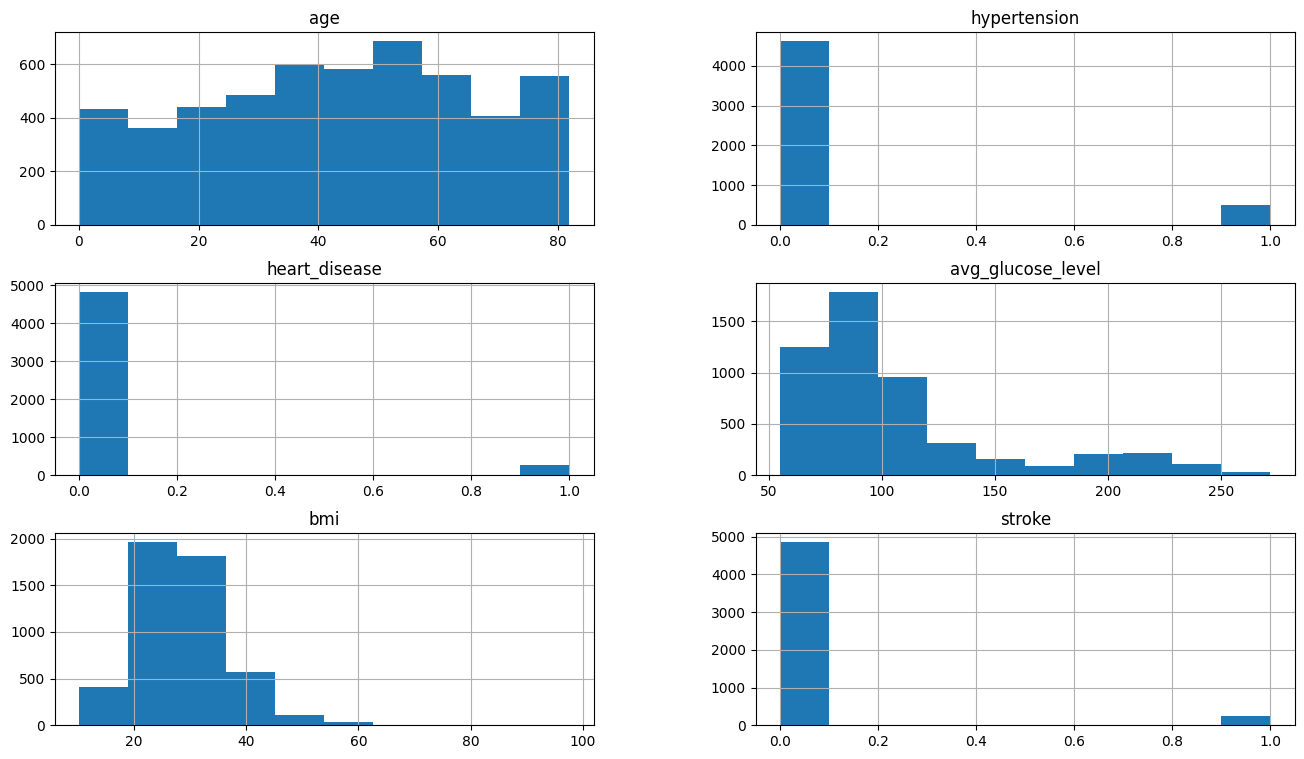

In [ ]:
data.hist(figsize=(16,9))
plt.show()

In [ ]:
le = LabelEncoder()
data['gender']= le.fit_transform(data['gender'])
data['ever_married']= le.fit_transform(data['ever_married'])
data['Residence_type']= le.fit_transform(data['Residence_type'])
data['work_type']= le.fit_transform(data['work_type'])
data['smoking_status']= le.fit_transform(data['smoking_status'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,NaN,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


<Axes: >

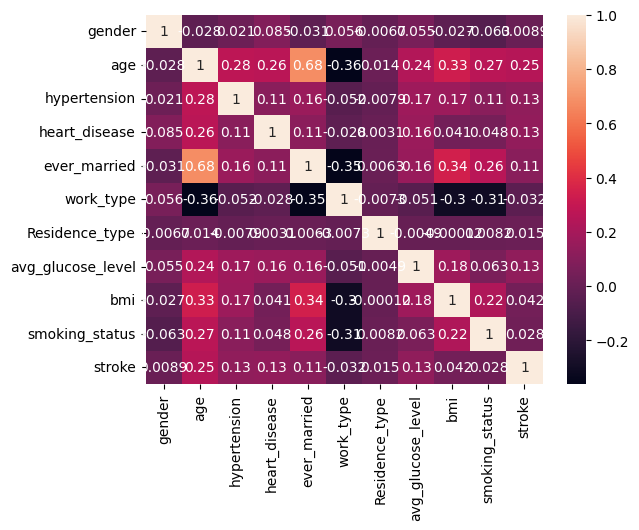

In [ ]:
corr = data.corr()
sb.heatmap(data = corr, annot = True)

In [ ]:
X = data[["age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level"]]
Y = data["stroke"]

SMOTE

In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_minority = XTrain.loc[XTrain["hypertension"] == 1]
# X_majority = XTrain.loc[XTrain["hypertension"] == 0]

# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_minority, X_majority)

# # Combine resampled data with majority class
# X_resampled = np.concatenate([X_resampled, X_majority])

# print(X_resampled)

# Udah bisa tapi nyari yang lain dlu
# X = df.drop(['hypertension'], axis=1)
# Y = df['hypertension']

# Y.value_counts().plot.pie(autopct = '%.2f')
count_class_0, count_class_1 = YTrain.value_counts()
strategi = {1: 3000, 0: count_class_0}
X_resampled, Y_resampled = SMOTE(sampling_strategy= 0.5, random_state = 42).fit_resample(XTrain, YTrain)

In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5851 non-null   float64
 1   hypertension       5851 non-null   int64  
 2   heart_disease      5851 non-null   int64  
 3   ever_married       5851 non-null   int64  
 4   avg_glucose_level  5851 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 228.7 KB


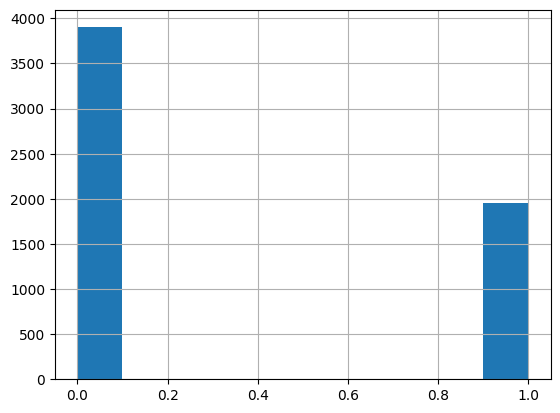

In [ ]:
Y_resampled.hist()

plt.show()

ADASYN

In [ ]:
# prompt: Adaptive Syn

from imblearn.over_sampling import ADASYN

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

ada = ADASYN(random_state=42, sampling_strategy =0.5)
X_resampled, Y_resampled = ada.fit_resample(XTrain, YTrain)


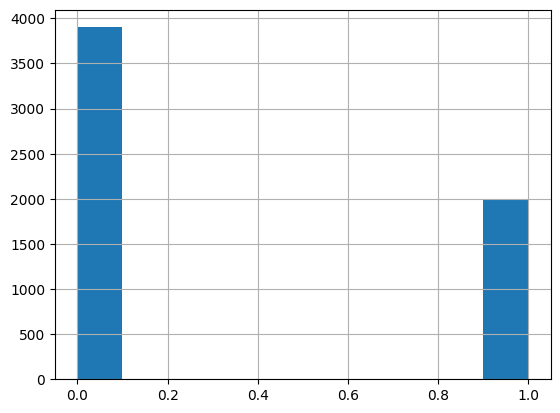

In [ ]:
Y_resampled.hist()

plt.show()

GAN's

In [ ]:
# prompt: Generative Adversarial Networks

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Install the necessary libraries
!pip install tensorflow-gpu
!pip install keras
!pip install numpy

# Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Dropout
from keras.optimizers import Adam
import numpy as np

# Define the generator model
def create_generator():
  model = Sequential()
  model.add(Dense(128, input_dim=100))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(XTrain.shape[1], activation='tanh'))
  return model

# Define the discriminator model
def create_discriminator():
  model = Sequential()
  model.add(Dense(256, input_dim=XTrain.shape[1]))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  return model

# Create the generator and discriminator models
generator = create_generator()
discriminator = create_discriminator()

# Compile the discriminator model
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Create the combined GAN model
z = keras.Input(shape=(100,))
generated_data = generator(z)
discriminator.trainable = False
validity = discriminator(generated_data)
gan = keras.Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train the GAN model
epochs = 10000
batch_size = 128
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train the discriminator
  idx = np.random.randint(0, XTrain.shape[0], batch_size)
  real_data = XTrain.iloc[idx] # Use .iloc to select rows by position
  noise = np.random.normal(0, 1, (batch_size, 100))
  generated_data = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(real_data, valid)
  d_loss_fake = discriminator.train_on_batch(generated_data, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  # Train the generator
  noise = np.random.normal(0, 1, (batch_size, 100))
  g_loss = gan.train_on_batch(noise, valid)

  # Print progress
  if epoch % 1000 == 0:
    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

# Generate synthetic data
num_samples = 1000
noise = np.random.normal(0, 1, (num_samples, 100))
synthetic_data = generator.predict(noise)

# Add the synthetic data to the training set
X_resampled = np.concatenate([XTrain, synthetic_data])
Y_resampled = np.concatenate([YTrain, np.ones(num_samples)])


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 5ms/step
6000 [D loss: 0.000002, acc.: 100.00%] [G loss: 13.585726]
4/4 [==============================] - 0s 5ms/step
7000 [D loss: 0.000000, acc.: 100.00%] [G loss: 15.052219]
4/4 [==============================] - 0s 4ms/step
8000 [D loss: 0.000000, acc.: 100.00%] [G loss: 16.470354]
4/4 [==============================] - 0s 4ms/step
9000 [D loss: 0.000000, acc.: 100.00%] [G loss: 17.573845]
32/32 [==============================] - 0s 3ms/step


In [ ]:
Y_resampled.hist()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

Try Every Algorithm

In [ ]:
algo = [XGBClassifier(), RandomForestClassifier(), LogisticRegression()]

In [ ]:
i = 0
for i in range (len(algo)):
  print(algo[i])
  Model = algo[i].fit(X_resampled, Y_resampled)

  Train = Model.predict(X_resampled)
  Test = Model.predict(XTest)


  print("Train set acc: ", accuracy_score(Y_resampled, Train))
  print("Test set acc: ", accuracy_score(YTest, Test))
  print("Train set loss: ", log_loss(Y_resampled, Train))
  print("Test set loss: ", log_loss(YTest, Test))
  print(classification_report(YTest, Test, digits=5))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Train set acc:  0.956271186440678
Test set acc:  0.9060665362035225
Train set loss:  1.5761461990495298
Test set loss:  3.385705210719419
              precision    recall  f1-score   support

           0    0.94444   0.95625   0.95031      

In [ ]:
parameters={"booster":["gbtree", "gblinear"],
            "eta":[0.1, 0.2],
            "max_depth":[3,5,7,9,10],
            "subsample":[0.5, 0.6, 0.7, 0.8, 0.9, 1],
            "colsample_bytree":[0.5, 0.6, 0.7, 0.8, 0.9, 1],
            "scale_pos_weight":[0.5, 1, 2, 5]}
XGB=XGBClassifier()
clf=GridSearchCV(XGB,parameters).fit(X_resampled,Y_resampled)
print("Best parameter:",clf.best_params_ )
print("Best score:",clf.best_score_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/

Best parameter: {'booster': 'gbtree', 'colsample_bytree': 0.5, 'eta': 0.1, 'max_depth': 3, 'scale_pos_weight': 0.5, 'subsample': 0.5}
Best score: 0.9630646398262929


In [ ]:
XGB = XGBClassifier(booster= 'gbtree', colsample_bytree= 0.8, eta =0.1, max_depth= 7, scale_pos_weight= 0.5, subsample= 0.5).fit(X_resampled, Y_resampled)

Train = XGB.predict(X_resampled)
Test = XGB.predict(XTest)

Train set acc:  0.9106779661016949
Test set acc:  0.9158512720156555
Train set loss:  3.2194924298414813
Test set loss:  3.033027584602814
              precision    recall  f1-score   support

           0    0.93876   0.97396   0.95603       960
           1    0.03846   0.01613   0.02273        62

    accuracy                        0.91585      1022
   macro avg    0.48861   0.49504   0.48938      1022
weighted avg    0.88414   0.91585   0.89941      1022



<Axes: >

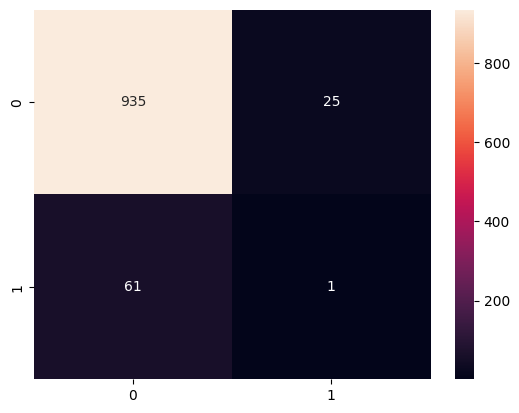

In [ ]:
print("Train set acc: ", accuracy_score(Y_resampled, Train))
print("Test set acc: ", accuracy_score(YTest, Test))
print("Train set loss: ", log_loss(Y_resampled, Train))
print("Test set loss: ", log_loss(YTest, Test))
print(classification_report(YTest, Test, digits = 5))

cm = confusion_matrix(YTest, Test)
sb.heatmap(cm, annot = True, fmt = "g")

In [ ]:
parameters={"penalty" : ['l1', 'l2'],
            "C" : np.logspace(-4,4,20),
            "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
            "multi_class" : ["auto", "ovr", "multinomial"]}
LR=LogisticRegression(random_state = 42)
clf=GridSearchCV(LR,parameters).fit(X_resampled, Y_resampled)
print("Best parameter:",clf.best_params_ )
print("Best score:",clf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameter: {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.963261296660118


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
LR= LogisticRegression(C= 0.23357214690901212, multi_class= 'auto', penalty= 'l2', solver= 'liblinear').fit(X_resampled, Y_resampled)
Train = LR.predict(X_resampled)
Test = LR.predict(XTest)

Train set acc:  0.7896610169491526
Test set acc:  0.8542074363992173
Train set loss:  7.581385399304134
Test set loss:  5.254896629137432
              precision    recall  f1-score   support

           0    0.96449   0.87708   0.91871       960
           1    0.20805   0.50000   0.29384        62

    accuracy                        0.85421      1022
   macro avg    0.58627   0.68854   0.60628      1022
weighted avg    0.91860   0.85421   0.88080      1022



<Axes: >

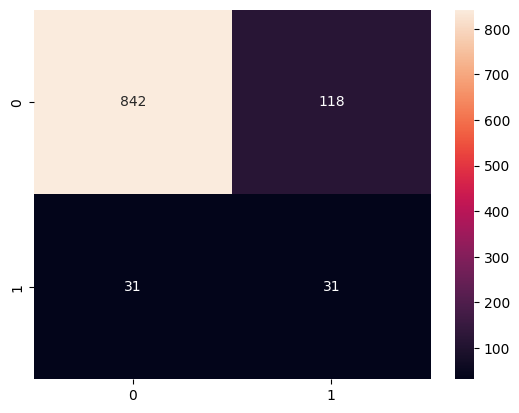

In [ ]:
print("Train set acc: ", accuracy_score(Y_resampled, Train))
print("Test set acc: ", accuracy_score(YTest, Test))
print("Train set loss: ", log_loss(Y_resampled, Train))
print("Test set loss: ", log_loss(YTest, Test))
print(classification_report(YTest, Test, digits = 5))
cm = confusion_matrix(YTest, Test)
sb.heatmap(cm, annot = True, fmt = "g")

In [ ]:
parameters={
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, 20],
    "n_estimators": [10, 20, 30, 50, 70, 100],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4]}

RF=RandomForestClassifier()
clf=GridSearchCV(RF,parameters).fit(X_resampled,Y_resampled)
print("Best parameter:",clf.best_params_ )
print("Best score:",clf.best_score_)

In [ ]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 70).fit(X_resampled, Y_resampled)

Train = RF.predict(X_resampled)
Test = RF.predict(XTest)

Train set acc:  0.9847457627118644
Test set acc:  0.9060665362035225
Train set loss:  0.5498184415289059
Test set loss:  3.385705210719419
              precision    recall  f1-score   support

           0    0.95000   0.95000   0.95000       960
           1    0.22581   0.22581   0.22581        62

    accuracy                        0.90607      1022
   macro avg    0.58790   0.58790   0.58790      1022
weighted avg    0.90607   0.90607   0.90607      1022



<Axes: >

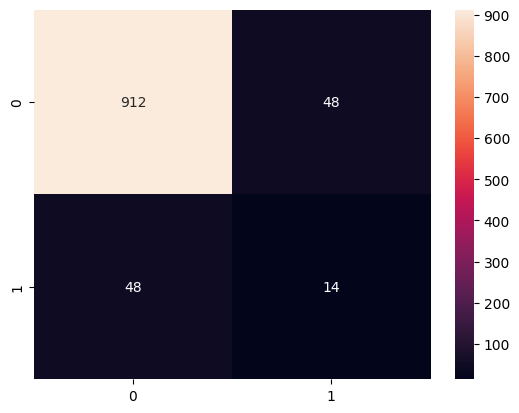

In [ ]:
print("Train set acc: ", accuracy_score(Y_resampled, Train))
print("Test set acc: ", accuracy_score(YTest, Test))
print("Train set loss: ", log_loss(Y_resampled, Train))
print("Test set loss: ", log_loss(YTest, Test))
print(classification_report(YTest, Test, digits = 5))

cm = confusion_matrix(YTest, Test)
sb.heatmap(cm, annot = True, fmt = "g")